### Question 1
The dataset used for this question is Question1_3.txt as the generated datasets were $(3, 4, 3, 1)$

The data file contains the times it takes for participants to respond to two versions of a web form.

##### 1. Make a maximum of two appropriate plot to show how the data are distributed and to show the difference between the two web forms. Explain why you used this type of plot. $(2+2pts)$


First we will import the data and describe it to have some general information about it. Such as the count, mean and standard deviation. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
"""This cell is just to read the data from the file and store it in a dataframe. As well as initializing some constants"""
df = pd.read_csv('datasets/Question1_3.txt', sep="\t", header=0)
xlabel = 'Response time'
df.describe()

,interface1,interface2
count,20.00000,20.000000
mean,30.68700,44.765000
std,13.11239,47.884777
min,17.89000,18.100000
25%,20.00000,22.350000
50%,28.33500,31.750000
75%,36.90000,43.200000
max,68.74000,234.700000


To continue we'll use "response time" as a way to describe the time it took for a participant to fill in the form. 

As we can see above we see that there are $20$ participants total. The means of the response times are $30.687$ and $44.765$ for the first interface and second interface respectively. The standard deviation is $13.11$ and $47.88$ rounded to two decimals.

The rest of the statistics will be shown in the plots below.

For the first plot I used a boxplot to show the distribution of the data. I used this plot because it shows the median, the $25-$, and $75$-quartile, range and the outliers. This gives a good overview of the data. I initially tried a histogram but as the data is on the ratio scale, it didn't give a good overview of the distribution of the data.

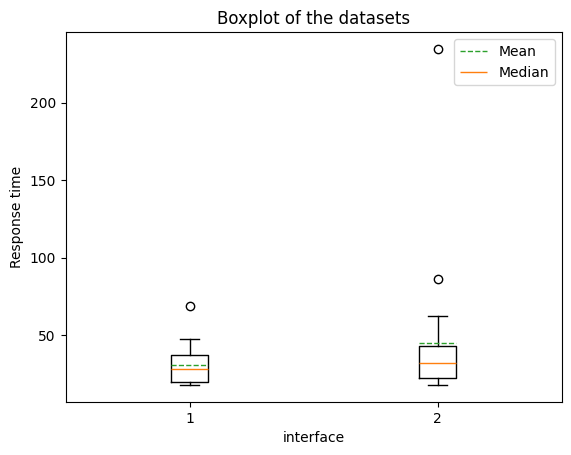

In [2]:
'''Cell makes boxplots of the datasets'''
bp = plt.boxplot([df['interface1'], df['interface2']], labels=['1', '2'], showmeans=True, meanline=True)
plt.title('Boxplot of the datasets')
plt.legend([bp['means'][0], bp['medians'][0]], ['Mean', 'Median'])
plt.xlabel('interface')
plt.ylabel(xlabel)
plt.show()

As my second plot to show how the data is distributed, I chose for QQ-plots. I chose this plot to visually see wether the data follows the normal distribution. This is important for other statistical tests we might have to use. 

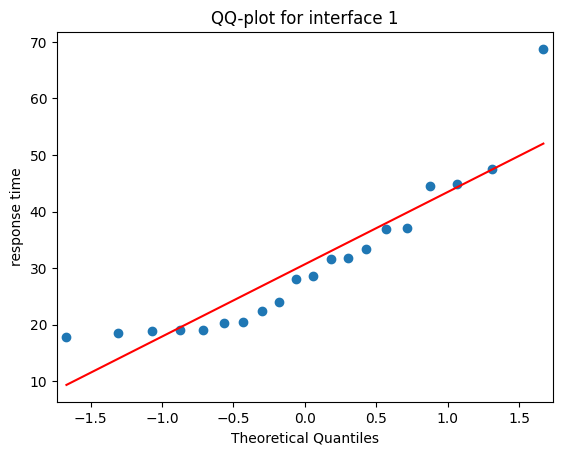

In [3]:
sm.qqplot(df['interface1'], line=('s'))
plt.title('QQ-plot for interface 1')
plt.ylabel('response time')
plt.show()

As we can see in the QQ-plot of the first interface, the data follows the normal distribution. We see that that most response times fall under the normal distribution but they are not far.

We do have one outlier, the last datapoint (as also shown in the boxplot). As it's only the one we can ignore it for now.

Now we'll look at the second interface. 

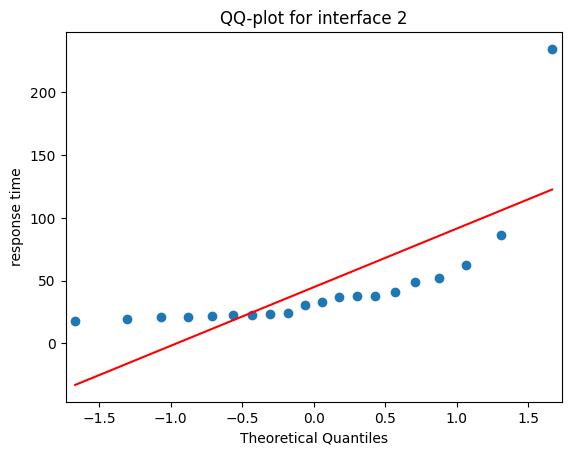

In [4]:
sm.qqplot(df['interface2'], line=('s'))
plt.title('QQ-plot for interface 2')
plt.ylabel('response time')
plt.show()

As we can see from the QQ-plot for the second interface, the data might not be normally distributed, It seems to have a mix of being uniformally distributed and normally distributed.


##### 2. Test whether one of the web forms has faster responses. Explain what you did and why and what the underlying experimental design was. (2+2+2 pts.)


To test wether one of the web forms has a faster response we will have to perform a statistical test to compare two samples. Such a test is the two sample t-test, however we saw at the last QQ-plot that it might not follow the normal distribution. Consequently we will first need to check if both samples follow the normal distribution and if not we cannot use the two sample t-test. To test this we will use the Shaprio-Wilk test, since this works well for small samples. If we can confirm that either or both samples do not follow the normal distribution we will have to use the Mann-Whitney U test instead. $\newline$ First let's formulate our hypothesis. 

let $\mu_1$ be the mean of the response times for the first interface and $\mu_2$ be the mean of the response times for the second interface.

Nullhypotheses $H_0$: There is no difference in response times between the two interfaces. $\mu_1$ = $\mu_2$ $\newline$
Alternative hypothesis $H_A$: There is a difference in response times between the two interfaces. $\mu_1$ $\neq$ $\mu_2$

We choose $\alpha = 0.05$ as our significance level.

Now, normally we would do a two sample t-test but, as we can see from the last QQ-plot, the data might not be normally distributed. To confirm our suspicion we will need to test our samples for normality. As our dataset is small, we will use the Shapiro-Wilk test.

Before we can do the Shapiro-Wilk test, we need to formulate our hypothesis.

Nullhypotheses $H_{BS0}$: The response times follow the normal distribution. $\newline$
Alternative hypothesis $H_{BSA}$: The response times do not follow the normal distribution. $\newline$
We choose $\alpha = 0.05$ as our significance level.

In [5]:
from scipy.stats import shapiro

shapiro_1 = shapiro(df['interface1'])
shapiro_2 = shapiro(df['interface2'])

print(f'Shapiro-Wilk test for interface 1: statistic =
       {shapiro_1.statistic}, p-value = {shapiro_1.pvalue}')
print(f'Shapiro-Wilk test for interface 2: statisitc = {shapiro_2.statistic}, p-value = {shapiro_2.pvalue}')

Shapiro-Wilk test for interface 1: statistic = 0.8557603359222412, p-value = 0.006667126901447773
Shapiro-Wilk test for interface 2: statisitc = 0.5255955457687378, p-value = 5.464456762638292e-07


The test statistic is $0.855$ for the first interface.
Surprisingly, the data for the first interface does not follow the normal distribution. This because $p$-$value = 0.007$ and $p$-$value < \alpha$.
This contradicts our conclusion from the QQ-plot. 

Now for the second interface, the test statistic is $0.525$ and the data does not follow the normal distribution either. This because $p$-$value = 5.46 * 10^{-7}$ and $p$-$value < \alpha$.

Following our conclusions from the Shapiro-Wilk tests, we have to reject our nullhypothesis $H_{BS0}$. Consequently we can not use the two sample t-test. Instead we will use the Mann-Whitney U test.


In [6]:
from scipy.stats import mannwhitneyu

mannwhit = mannwhitneyu(df['interface1'], df['interface2'])
print(f'Mann-Whitney U test: statistic = {mannwhit.statistic}, p-value = {mannwhit.pvalue}')

Mann-Whitney U test: statistic = 156.0, p-value = 0.23930166542779607


The test statistic from the Mann-Whitney U test is $156$ and the $p$-$value = 0.239$. Since the $p$-$value > \alpha$ we cannot reject our nullhypothesis $H_0$. We conclude that there is not enough evidence to reject the null hypothesis at the $5\%$ significance level and thus cannot say if there is a difference in response times between the two interfaces.